In [86]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import matplotlib.transforms as mpt

# Reading the audio

In [93]:
hop_length = 512
n_fft = 1024
sr = 22050

y, sr = librosa.load('./labeled_recs_sample/W52753S23867_20200124_081000.wav', sr=sr)
y -= np.mean(y)
y /= np.std(y)

mel = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length)
mel = librosa.power_to_db(mel, ref=np.max)

mel

array([[-18.982729, -17.21905 , -11.600063, ..., -23.091957, -21.756355,
        -18.461872],
       [-23.547329, -14.570009,  -9.291275, ..., -19.892439, -17.989815,
        -22.775126],
       [-33.088787, -20.08786 , -13.539104, ..., -18.476412, -17.635048,
        -23.48736 ],
       ...,
       [-53.302773, -66.4561  , -66.58302 , ..., -66.06285 , -65.05361 ,
        -64.36931 ],
       [-53.518684, -80.      , -77.92868 , ..., -73.286026, -72.7325  ,
        -74.79335 ],
       [-53.913937, -80.      , -80.      , ..., -80.      , -80.      ,
        -80.      ]], dtype=float32)

# Applying Noise Profiling

### 1 - segmentar
### 2 - usar np.mean para obter as médias (axis=0)
### 4 - subtrair a média na escala mel

In [94]:
chunk_quantities = 8
chunk_size = len(mel[0])//chunk_quantities

noise_profiling_result = []

for offset in range(chunk_quantities):
  frequency_means = np.mean(mel[::,chunk_size*offset:323*(chunk_size+1)], axis=1)
  print(frequency_means.shape)
  noise_profiling_result.append(mel[::,chunk_size*offset:chunk_size*(offset+1)].T-frequency_means)

noise_profiling_result = np.vstack(noise_profiling_result).T

bounds = librosa.segment.agglomerative(noise_profiling_result, 10)
bound_times = librosa.frames_to_time(bounds, sr=sr, n_fft=n_fft, hop_length=hop_length)

(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)


[Text(0.5, 1.0, 'Spectrogram')]

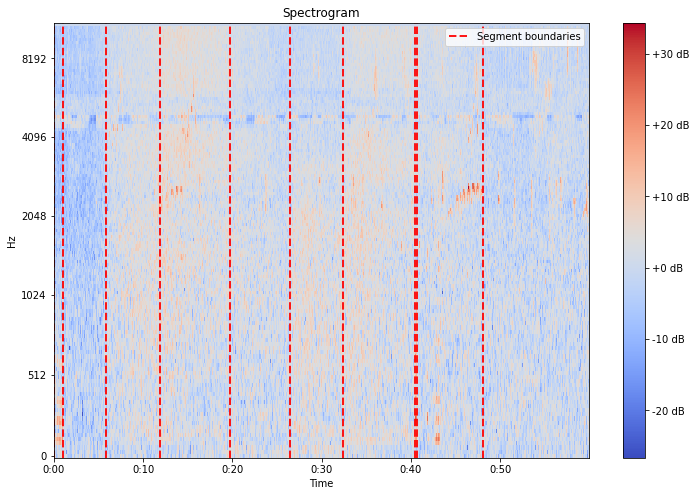

In [95]:
fig, ax = plt.subplots(figsize=(12, 8))
trans = mpt.blended_transform_factory(ax.transData, ax.transAxes)
img = librosa.display.specshow(noise_profiling_result, y_axis='mel', x_axis='time', ax=ax, n_fft=n_fft, hop_length=hop_length, sr=sr)
ax.vlines(bound_times,
          0, 
          1,
          color='red',
          linestyle='--',
          linewidth=2,
          alpha=0.9,
          label='Segment boundaries',
          transform=trans,
         )
ax.legend()
fig.colorbar(img, ax=ax, format="%+2.f dB")
ax.set(title='Spectrogram')